In [ ]:
Collin Ryan Section A

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
df = pd.read_csv("titanic.csv")


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [9]:
df.info()
total = df["Age"].count()
males = (df['Sex'] == 1).sum()
survived = (df['Survived'] == 1).sum()
malesPercent = males/total * 100
survivedPercent = survived/total * 100
print(malesPercent)
print(survivedPercent)
print(total)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   Embarked     891 non-null    object 
 3   Fare         891 non-null    float64
 4   Name         891 non-null    object 
 5   Parch        891 non-null    int64  
 6   PassengerId  891 non-null    int64  
 7   Pclass       891 non-null    int64  
 8   Sex          891 non-null    int64  
 9   SibSp        891 non-null    int64  
 10  Survived     891 non-null    int64  
 11  Ticket       891 non-null    object 
 12  Title        891 non-null    object 
 13  Family_Size  891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB
64.75869809203144
38.38383838383838
891


Your written answer:

 - 891 total passengers
 - 64.75% were male
 - 38.38% survived

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [10]:
femaleSurvive = df[(df['Sex'] == 0) & (df['Survived'] == 1)].shape[0]
females = total - males
percentF = femaleSurvive / females * 100
print(percentF)

maleSurvive = df[(df['Sex'] == 1) & (df['Survived'] == 1)].shape[0]
percentM = maleSurvive / males * 100

print(percentM)

74.20382165605095
18.890814558058924


#### Your written answer:

 - 74.20% of female passengers survived
 - 18.89% of male passengers survived

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [11]:


summ = df.groupby('Pclass').agg(
    totalTickets = ('Pclass', 'size'),
    survivorship = ('Survived', 'mean')
)

summ['totalTickets'] = (summ['totalTickets'] / summ['totalTickets'].sum()) * 100
summ['survivorship'] = summ['survivorship'] * 100

print(summ[['totalTickets','survivorship']])

        totalTickets  survivorship
Pclass                            
1          24.242424     62.962963
2          20.650954     47.282609
3          55.106622     24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.24%
    - % survivorship: 62.96%
- Class 2 
    - % tickets: 20.65%
    - % survivorship: 47.28%
- Class 3
    - % tickets: 55.11%
    - % survivorship: 24.25%


##Question 4:
Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the documentation for histogram) to make this figure easy to read and interpret.

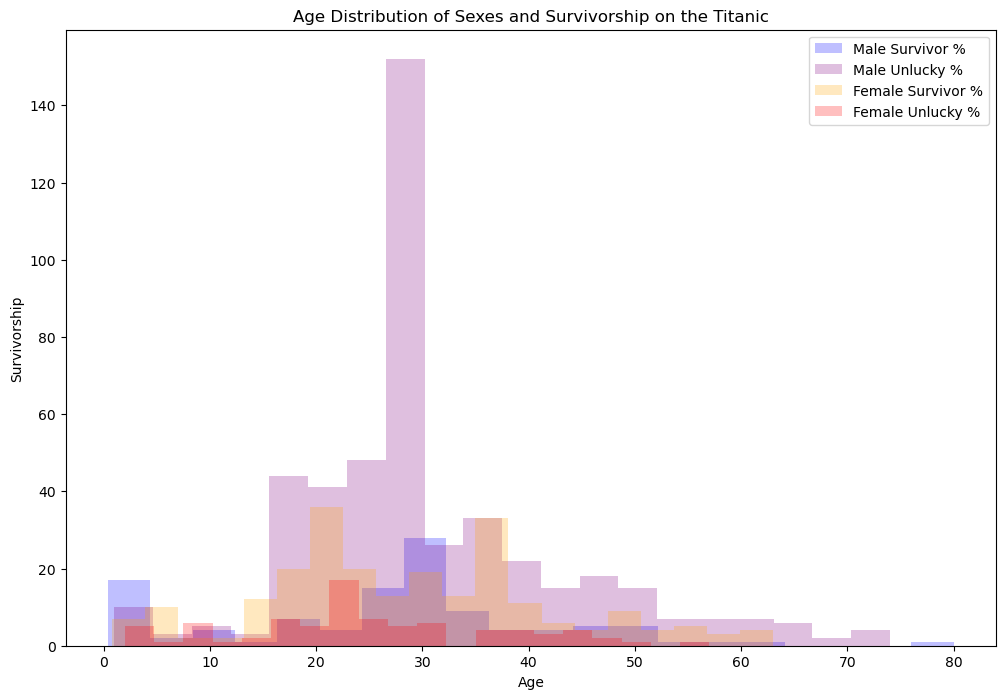

In [12]:
survivors = df[df["Survived"] == 1][['Age', 'Name', 'Sex']]
non_survivors = df[df["Survived"] == 0][['Age', 'Name', 'Sex']]

#males
plt.figure(figsize=(12,8))
plt.hist(survivors[survivors['Sex'] == 1]['Age'].dropna(),
         bins = 20, alpha = 0.25, label = "Male Survivor %", color = 'blue')
plt.hist(non_survivors[non_survivors['Sex'] == 1]['Age'].dropna(),
         bins = 20, alpha = 0.25, label = "Male Unlucky %", color = 'purple')

#females
plt.hist(survivors[survivors['Sex'] == 0]['Age'].dropna(),
         bins = 20, alpha = 0.25, label = "Female Survivor %",color = 'orange')

plt.hist(non_survivors[non_survivors['Sex'] == 0]['Age'].dropna(),
         bins = 20, alpha = 0.25, label = "Female Unlucky %",color = "red")

#extra tidbits
plt.xlabel("Age")
plt.ylabel("Survivorship")
plt.title("Age Distribution of Sexes and Survivorship on the Titanic")
plt.legend()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [13]:
features = ["Age", "Sex", "Pclass", ]
label = ["Survived"]


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size = 0.2)


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()

scaler.fit(X_train)

Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

ys_train = y_train.values.ravel()
ys_test = y_test.values.ravel()



In [33]:
Xs_train.shape

np.sqrt(712)

26.68332812825267

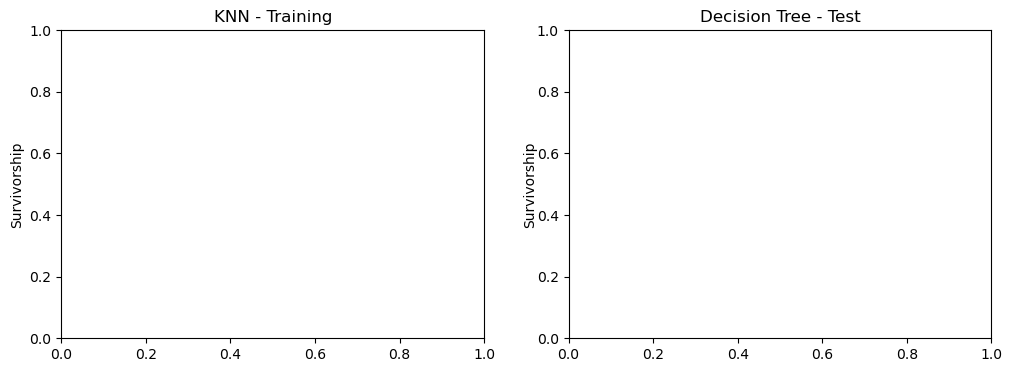

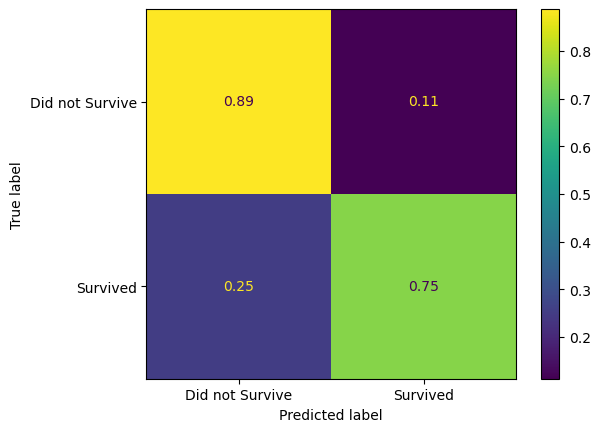

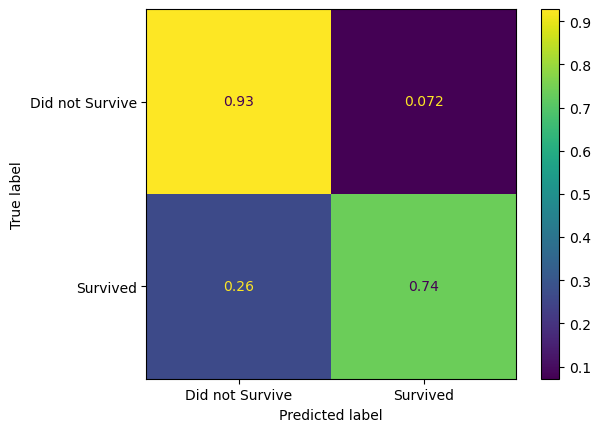

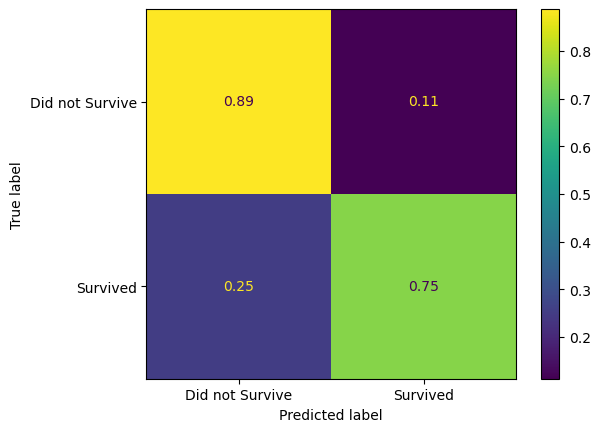

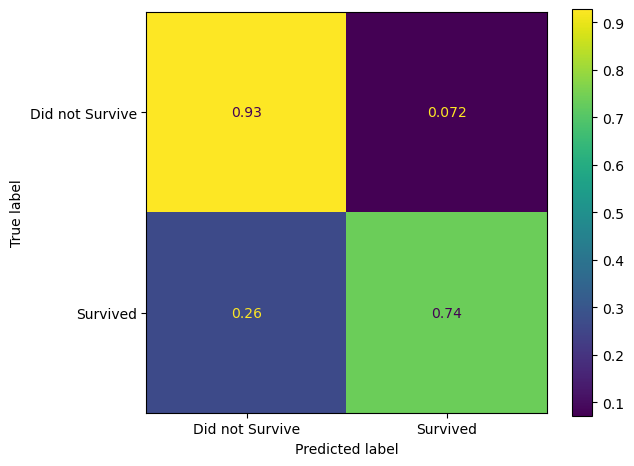

In [24]:
knn_clf = KNeighborsClassifier(n_neighbors = 5)

knn_clf.fit(Xs_train, y_train.values.ravel())
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(Xs_train, y_train)

y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)
y_tree_train = tree_clf.predict(Xs_train)
y_tree_test = tree_clf.predict(Xs_test)

fig, ax = plt.subplots(1,2, figsize = (12,4))
ConfusionMatrixDisplay.from_predictions(y_train,y_knn_train,normalize = 'true', display_labels=["Did not Survive", "Survived"])
ConfusionMatrixDisplay.from_predictions(y_test,y_knn_test,normalize = 'true', display_labels=["Did not Survive", "Survived"])
ax[0].set_title("KNN - Training")
ax[0].set_ylabel("Survivorship")
ax[1].set_title("Decision Tree - Test")
ax[1].set_ylabel("Survivorship", labelpad=0.01)

ConfusionMatrixDisplay.from_predictions(y_train,y_knn_train,normalize = 'true', display_labels=["Did not Survive", "Survived"])
ConfusionMatrixDisplay.from_predictions(y_test,y_knn_test,normalize = 'true', display_labels=["Did not Survive", "Survived"])
ax[0].set_title("KNN - Training")
ax[0].set_ylabel("Survivorship")
ax[1].set_title("Decision Tree - Test")
ax[1].set_ylabel("Survivorship")

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'modelPlot'

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?
 
 - 